# whale back challenge, data wrangling, tensorflow models

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right
create flipped images of underrepresented classes

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 18px; }</style>"))

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
from skimage import io, transform, util, draw
import skimage
import glob
from tqdm import tnrange, tqdm, tqdm_notebook
from collections import Counter
from random import shuffle

%matplotlib inline

In [22]:
# some prep steps
data_folder = os.getcwd() + "/data/"
labels_csv = pd.read_csv(data_folder+"train.csv")
train_folder = data_folder + "train/"
gray_train_folder = data_folder + "train_100x100_gray/"
test_folder = data_folder + "test/"
gray_test_folder = data_folder + "test_100x100_gray/"
images_glob_pattern = os.path.join(train_folder, '*.jpg')
glob_list = glob.glob(images_glob_pattern)
gray_glob_pattern = os.path.join(gray_train_folder, '*.jpg')
gray_glob_list = glob.glob(gray_glob_pattern)
humpback_glob_pattern = os.path.join(data_folder, 'humpback_300x100_gray/', '*.jpg')
humpback_glob_list = glob.glob(humpback_glob_pattern)

image before preprocessing:
shape:  (700, 1050, 3)


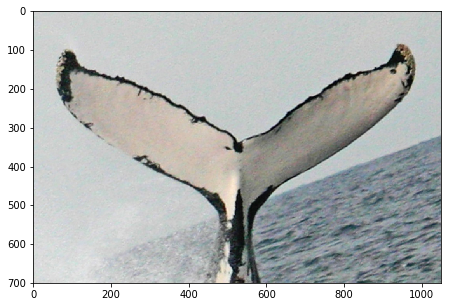

image after preprocessing: 
shape:  (100, 100)


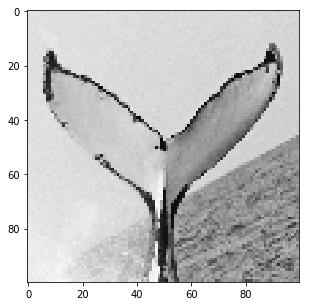

In [23]:
#display one original image, preprocess it and display it again
random_index = round(np.random.rand()*len(glob_list))
test_image = io.imread(glob_list[random_index])
print("image before preprocessing:")
print("shape: ",test_image.shape)
plt.figure(figsize=(10,5))
plt.imshow(test_image)
plt.show()
gray_image = io.imread(glob_list[random_index], as_gray=True)
gray_image = transform.resize(gray_image, (100,100), mode="reflect").astype(np.float)
print("image after preprocessing: ")
print("shape: ", gray_image.shape)
plt.figure(figsize=(10,5))
plt.imshow(gray_image, cmap="gray")
plt.show()

In [24]:
labels_csv
unique_classes = pd.unique(labels_csv['Id'])
encoding = dict(enumerate(unique_classes))
encoding = {value: key for key, value in encoding.items()}
labels_csv = labels_csv.replace(encoding)

In [25]:
dict(enumerate(unique_classes))

{0: 'w_f48451c',
 1: 'w_c3d896a',
 2: 'w_20df2c5',
 3: 'new_whale',
 4: 'w_dd88965',
 5: 'w_64404ac',
 6: 'w_a6f9d33',
 7: 'w_581ba42',
 8: 'w_cb622a2',
 9: 'w_d3b46e7',
 10: 'w_8cad422',
 11: 'w_13ae3d4',
 12: 'w_3de579a',
 13: 'w_1d0830e',
 14: 'w_2ba6978',
 15: 'w_8dddbee',
 16: 'w_2365d55',
 17: 'w_3879fa0',
 18: 'w_9c506f6',
 19: 'w_8a6a8d5',
 20: 'w_662530e',
 21: 'w_a8b34a0',
 22: 'w_c0d11da',
 23: 'w_50e8d58',
 24: 'w_3881f28',
 25: 'w_9ad3551',
 26: 'w_cee684e',
 27: 'w_41d24c6',
 28: 'w_8a235b6',
 29: 'w_2e231f4',
 30: 'w_6822dbc',
 31: 'w_df86a42',
 32: 'w_700ebb4',
 33: 'w_d892cd9',
 34: 'w_7a4b2f9',
 35: 'w_bc285a6',
 36: 'w_c70fbcd',
 37: 'w_778e474',
 38: 'w_f3252ff',
 39: 'w_2df85e7',
 40: 'w_c7cda47',
 41: 'w_62bb54b',
 42: 'w_c6c89db',
 43: 'w_1531bf5',
 44: 'w_4e1e04d',
 45: 'w_d6ca28d',
 46: 'w_1260eb5',
 47: 'w_fccccec',
 48: 'w_acd217a',
 49: 'w_5650932',
 50: 'w_c98aaad',
 51: 'w_dd944b7',
 52: 'w_6f0cbe3',
 53: 'w_6cfa650',
 54: 'w_6e209a8',
 55: 'w_1ea5d96',
 5

In [26]:
#print all pictures for one whale for first impression.
#test_set = labels[labels["Id"]=="w_bfe77d0"]
#for image_id in test_set["Image"]:
#    cur_image = io.imread("data/train_100x100_gray/" + image_id)
#    plt.figure(figsize=(10,5))
#    plt.imshow(cur_image)
#    plt.show()


In [27]:
# load every picture as grayscale image, reshape then save to other folder
#for image in tqdm(glob_list):
#    gray_image = io.imread(image, as_gray=True)
#    gray_image = transform.resize(gray_image, (100,100), mode="reflect").astype(np.float)
#    io.imsave(gray_train_folder + image[-13:], gray_image)

In [ ]:
# use cropping models output from https://www.kaggle.com/suicaokhoailang/generating-whale-bounding-boxes/data
crop_table = pd.read_csv(data_folder+"bounding_boxes.csv")
for image in tqdm(glob_list[:5]):
    gray_image = io.imread(image, as_gray=True)
    print("image before preprocessing:")
    print("shape: ",gray_image.shape)
    plt.figure(figsize=(10,5))
    plt.imshow(gray_image, cmap="gray")
    plt.show()
    x0,y0,x1,y1 = crop_table[crop_table["Image"]==image[-13:]][["x0", "y0", "x1", "y1"]].values[0]
    rectangle = draw.rectangle((int(y0),int(x0)),(int(y1),int(x1)), shape=gray_image.shape)
    gray_image = gray_image[rectangle].T
    #gray_image_shapes.append((gray_image.shape))
    gray_image = transform.resize(gray_image, (100,300), mode="reflect").astype(np.float)
    print("image after preprocessing: ")
    print("shape: ", gray_image.shape)
    plt.figure(figsize=(10,5))
    plt.imshow(gray_image, cmap="gray")
    plt.show()
    #io.imsave("data/humpback_300x100_gray/"+image[-13:], gray_image)
    

In [42]:
# load pictures and labels in two numpy arrays
tensor_list = []
for image in tqdm(humpback_glob_list):
    cur_image = io.imread(image, as_gray=True)
    image_id = image[-13:]
    whale_id = labels_csv[labels_csv["Image"]==image_id]["Id"].values[0]
    tensor_list.append([whale_id, cur_image])
        
tensor_list = list(map(list, zip(*tensor_list)))

100%|██████████| 25361/25361 [00:52<00:00, 486.66it/s]


In [43]:
labels = np.array(tensor_list[0])
features = np.array(tensor_list[1])

In [44]:
labels.shape

(25361,)

In [45]:
#remove new whales from data
not_new_whale = labels != 3
labels = labels[not_new_whale]
features = features[not_new_whale]
#labels = np.extract(not_new_whale, labels)
#features = np.extract(not_new_whale, features)

In [47]:
features.shape

(15697, 100, 300)

In [48]:
# save data in .npz-file
np.savez(data_folder + "humpback_300x100_gray_no_new", features=features, labels=labels)